In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## サンプルデータの生成

In [6]:
N = 30000
K = 5

centers = np.array([
    [8, 8],
    [8, -8],
    [0, 0],
    [-8, 8],
    [-8, -8],
])

z = np.random.randint(0, K, N)
pts = np.random.randn(N, 2) + centers[z]

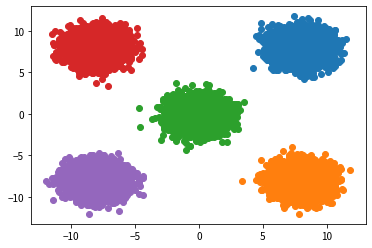

In [7]:
for k in range(K):
    plt.scatter(pts[z == k, 0], pts[z == k, 1], label=f'Cluster {k}')

plt.show()

## 正規分布

In [32]:
# 2枚のコインのデータを生成する。
n = 200 # コイン投げ回数
trials1 = np.random.rand(n) < 0.5
trials2 = np.random.rand(n) < 0.55
h1 = sum(trials1)
h2 = sum(trials2)

# 最尤推定
print(h1/n, h2/n)
# pymc3によるモデル化
with pm.Model() as model:
    p1 = pm.Uniform('p1', lower=0.0, upper=1.0)
    y1 = pm.Binomial('y1', n=n, p=p1, observed=h1)
    
    p2 = pm.Uniform('p2', lower=0.0, upper=1.0)
    y2 = pm.Binomial('y2', n=n, p=p2, observed=h2)
    # 2枚目のコインと1枚目のコインの差
    delta = pm.Deterministic('delta', p2-p1)

0.485 0.545


In [33]:
# MCMCの実行
with model:
    trace = pm.sample(2000, tune=500, step=pm.NUTS())

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p2, p1]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.


/home/yuki/.local/share/virtualenvs/exercises-qEkKQ9mk/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'p1'}>,
        <AxesSubplot:title={'center':'p1'}>],
       [<AxesSubplot:title={'center':'p2'}>,
        <AxesSubplot:title={'center':'p2'}>],
       [<AxesSubplot:title={'center':'delta'}>,
        <AxesSubplot:title={'center':'delta'}>]], dtype=object)

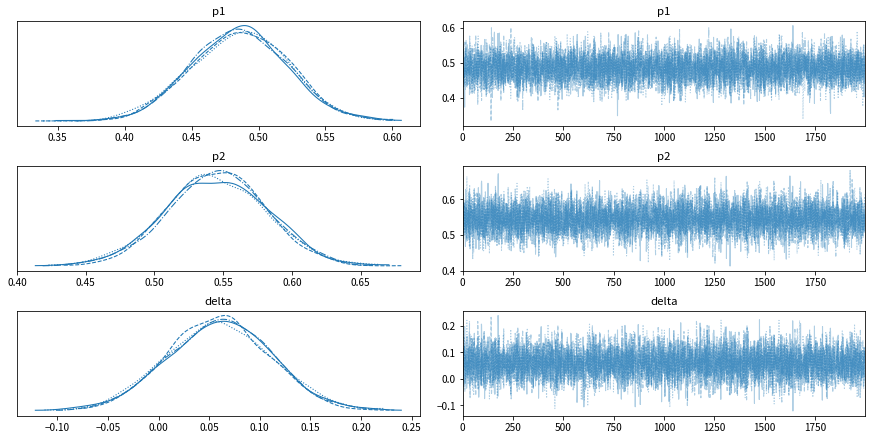

In [34]:
pm.traceplot(trace)